In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import metpy
from metpy.units import units
from metpy.calc import potential_temperature

import warnings
warnings.filterwarnings('ignore')

In [88]:
data = pd.read_excel(r'F:\INSAT_3D_R\NEW2\playground\2024\Feb-2024\MWR Hourly Files\Temperature\Feb-2024_Temperature_K_mean.xlsx',
                    index_col='plevels')
data

,2024-02-01 00:00:00,2024-02-01 01:00:00,2024-02-01 02:00:00,2024-02-01 03:00:00,2024-02-01 04:00:00,2024-02-01 05:00:00,2024-02-01 06:00:00,2024-02-01 07:00:00,2024-02-01 08:00:00,2024-02-01 09:00:00,...,2024-02-29 14:00:00,2024-02-29 15:00:00,2024-02-29 16:00:00,2024-02-29 17:00:00,2024-02-29 18:00:00,2024-02-29 19:00:00,2024-02-29 20:00:00,2024-02-29 21:00:00,2024-02-29 22:00:00,2024-02-29 23:00:00
plevels,,,,,,,,,,,,,,,,,,,,,
947.000000,285.232500,284.230000,286.388462,291.801923,295.540769,297.42440,298.733846,299.493462,299.864615,299.90520,...,296.067444,295.180150,294.518797,294.236015,293.378797,292.512256,291.475615,290.283383,289.599248,289.278443
941.076380,288.809937,288.369692,289.291663,292.274154,294.913760,296.39896,297.621279,298.355269,298.759452,298.93198,...,298.636293,298.068955,297.351985,296.591624,295.713977,294.711609,293.780554,293.120218,293.036872,292.695975
935.503809,291.095927,290.960077,291.129519,292.563038,294.330538,295.46976,296.534394,297.267865,297.647731,297.89004,...,299.864699,299.576534,298.908820,297.988940,297.198504,296.275406,295.541238,295.270850,295.492376,295.183205
929.870153,292.789656,292.890385,292.416596,292.403529,293.176298,293.90050,294.750942,295.599375,295.841558,296.21793,...,300.277023,300.302940,299.728722,298.793053,298.162669,297.439323,296.949554,297.042714,297.451256,297.193951
924.087741,294.476656,294.811933,293.705115,292.277394,292.068154,292.37910,293.008000,293.954846,294.063923,294.57301,...,300.741962,301.077098,300.590624,299.637128,299.166887,298.638120,298.385254,298.836639,299.432940,299.224402
918.664034,294.284187,294.578510,293.501163,292.112471,291.853952,292.13699,292.686885,293.585606,293.698413,294.23401,...,300.511602,300.877143,300.395917,299.483992,299.061556,298.596286,298.389315,298.881113,299.462857,299.265992
913.003360,294.065656,294.322846,293.267096,291.909712,291.594596,291.85128,292.344788,293.216212,293.329865,293.88240,...,300.208797,300.591203,300.119429,299.256850,298.875940,298.470707,298.303546,298.812474,299.367038,299.184131
907.168126,293.771687,293.994788,292.972365,291.655558,291.290702,291.51858,291.962077,292.822279,292.921087,293.49084,...,299.831331,300.236812,299.778316,298.966023,298.621812,298.274481,298.145785,298.669902,299.196128,299.029844
901.414342,293.408906,293.610683,292.611596,291.266683,290.829192,291.01802,291.396240,292.252654,292.337490,292.91140,...,299.354489,299.769474,299.309173,298.533895,298.232045,297.937556,297.830446,298.372857,298.878038,298.711066


### Calculate Potential Temperature using Metpy

In [89]:
da = pd.DataFrame(index=data.index)
for i in data.columns:
    a = []
    for j in np.arange(0,data[i].values.shape[0]):
        th = potential_temperature(data.index[j] * units.mbar,data[i].values[j] * units.kelvin)
        a.append(th.magnitude)
    da[i] = a
        

In [90]:
da

,2024-02-01 00:00:00,2024-02-01 01:00:00,2024-02-01 02:00:00,2024-02-01 03:00:00,2024-02-01 04:00:00,2024-02-01 05:00:00,2024-02-01 06:00:00,2024-02-01 07:00:00,2024-02-01 08:00:00,2024-02-01 09:00:00,...,2024-02-29 14:00:00,2024-02-29 15:00:00,2024-02-29 16:00:00,2024-02-29 17:00:00,2024-02-29 18:00:00,2024-02-29 19:00:00,2024-02-29 20:00:00,2024-02-29 21:00:00,2024-02-29 22:00:00,2024-02-29 23:00:00
plevels,,,,,,,,,,,,,,,,,,,,,
947.000000,289.705111,288.686891,290.879199,296.377547,300.175020,302.088187,303.418166,304.189693,304.566667,304.607888,...,300.709953,299.808746,299.137023,298.849806,297.979147,297.099018,296.046122,294.835195,294.140332,293.814496
941.076380,293.865013,293.417062,294.355171,297.389864,300.075671,301.586867,302.830580,303.577418,303.988675,304.164223,...,303.863361,303.286092,302.556573,301.782904,300.889895,299.869982,298.922631,298.250737,298.165932,297.819069
935.503809,296.694043,296.555580,296.728281,298.189368,299.990859,301.151989,302.237098,302.984674,303.371845,303.618814,...,305.631448,305.337741,304.657186,303.719616,302.913979,301.973129,301.224842,300.949254,301.175040,300.859924
929.870153,298.935799,299.038642,298.554908,298.541567,299.330557,300.069962,300.938256,301.804499,302.051765,302.436038,...,306.580338,306.606799,306.020527,305.065217,304.421601,303.683071,303.183020,303.278136,303.695254,303.432547
924.087741,301.194543,301.537468,300.405401,298.945109,298.731095,299.049135,299.692382,300.660829,300.772394,301.293095,...,307.602779,307.945560,307.447989,306.472740,305.991772,305.450942,305.192307,305.653990,306.263894,306.050599
918.664034,301.504349,301.805892,300.702113,299.279350,299.014488,299.304470,299.867856,300.788627,300.904203,301.452940,...,307.884550,308.259060,307.766028,306.831729,306.398929,305.922243,305.710194,306.214058,306.810075,306.608380
913.003360,301.812980,302.076946,300.993381,299.600236,299.276818,299.540265,300.046775,300.941156,301.057804,301.624896,...,308.117965,308.510446,308.026242,307.140938,306.749993,306.334084,306.162519,306.684855,307.254029,307.066304
907.168126,302.064121,302.293519,301.242236,299.888258,299.513103,299.747414,300.203430,301.087913,301.189510,301.775346,...,308.294813,308.711740,308.240301,307.405079,307.051152,306.694017,306.561688,307.100600,307.641680,307.470702
901.414342,302.240053,302.447903,301.418745,300.033352,299.582694,299.777205,300.166809,301.048999,301.136389,301.727573,...,308.364588,308.792064,308.317909,307.519296,307.208361,306.905009,306.794675,307.353411,307.873797,307.701799


In [91]:
da.to_excel(r'F:\INSAT_3D_R\NEW2\playground\2024\Feb-2024\MWR Hourly Files\Calculated Potential Temperature\MWR_theta_Calculated_Feb-2024.xlsx')

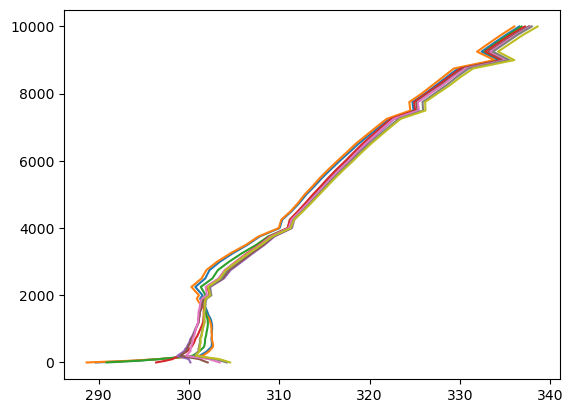

In [93]:
plt.plot(da[da.columns[0]],alts_hacpl['MWR_Alt(mts)'].values)
plt.plot(da[da.columns[1]],alts_hacpl['MWR_Alt(mts)'].values)
plt.plot(da[da.columns[2]],alts_hacpl['MWR_Alt(mts)'].values)
plt.plot(da[da.columns[3]],alts_hacpl['MWR_Alt(mts)'].values)
plt.plot(da[da.columns[4]],alts_hacpl['MWR_Alt(mts)'].values)
plt.plot(da[da.columns[5]],alts_hacpl['MWR_Alt(mts)'].values)
plt.plot(da[da.columns[6]],alts_hacpl['MWR_Alt(mts)'].values)
plt.plot(da[da.columns[7]],alts_hacpl['MWR_Alt(mts)'].values)
plt.plot(da[da.columns[8]],alts_hacpl['MWR_Alt(mts)'].values)
# plt.ylim(0,2500)